###### 問題1 GANの基本を知る

In [18]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torch.nn as nn
from torch.autograd import Variable
import itertools
import math
import time
import matplotlib.pyplot as plt
from IPython import display
import torchvision.datasets as dsets
import torch

In [19]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
train_dataset = dsets.MNIST(root='~/tmp/mnis', train=True, download=True, transform=transform)
print(train_dataset)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
print(train_loader)

#train_ = next(iter(train_loader))

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: /Users/naoki/tmp/mnis
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5,), std=(0.5,))
                         )
    Target Transforms (if any): None


In [20]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(784,1024),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Dropout(0.3),
          nn.Linear(1024,512),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Dropout(0.3),
          nn.Linear(512,256),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Dropout(0.3),
          nn.Linear(256,1),
          nn.Sigmoid()
        )

        def forward(self,x):
            out = self.model(x.view(x.size(0),784))
            out = out.view(out.size(0),-1)
            return out

In [30]:
#Discriminator(判別器)の作成
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
      nn.Linear(784,1024),
      nn.LeakyReLU(0.2, inplace = True),
      nn.Dropout(0.3),
      nn.Linear(1024,512),
      nn.LeakyReLU(0.2, inplace = True),
      nn.Dropout(0.3),
      nn.Linear(512,256),
      nn.LeakyReLU(0.2, inplace = True),
      nn.Dropout(0.3),
      nn.Linear(256,1),
      nn.Sigmoid()
    )

  def forward(self,x):
    out = self.model(x.view(x.size(0),784))
    out = out.view(out.size(0),-1)
    return out

In [21]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(100,200),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Dropout(0.3),
          nn.Linear(200, 400),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Dropout(0.3),
          nn.Linear(400, 784),
          nn.Tanh()
        )

    def forward(self, x):
        x = x.view(x.size(0), 100)
        out = self.model(x)
        return out

In [31]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
      nn.Linear(100,300),
      nn.LeakyReLU(0.2, inplace = True),
      nn.Dropout(0.3),
      nn.Linear(300,512),
      nn.LeakyReLU(0.2, inplace = True),
      nn.Dropout(0.3),
      nn.Linear(512,784),
      nn.Tanh()
    )
        
  def forward(self, x):
    x = x.view(x.size(0),100)
    out = self.model(x)
    return out

In [22]:
discriminator = Discriminator()
generator = Generator()

In [23]:
criterion = nn.BCELoss()
lr = 0.0002
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)

In [47]:
def train_discriminator(discriminator,images,real_labels,fake_images,fake_labels):
    discriminator.zero_grad()
    outputs = discriminator(images)
    real_loss = criterion(outputs, real_labels)
    real_score = outputs

    outputs = discriminator(fake_images)
    fake_loss = criterion(outputs, fake_labels)
    fake_score = outputs

    d_loss = real_loss + fake_loss
    d_loss.backward(retain_graph=True)
    d_optimizer.step()
    return d_loss, real_score, fake_score

In [48]:
def train_generator(generator, outputs, real_labels):
    # 勾配を0に設定
    generator.zero_grad()
    # lossを設定
    g_loss = criterion(outputs, real_labels)
    # backwardを設定
    g_loss.backward(retain_graph=True)
    # オプティマイザーを設定
    g_optimizer.step()
    
    return g_loss

In [26]:
#generation on training 
num_test_samples = 16
test_noise = Variable(torch.randn(num_test_samples, 100))

In [49]:
for n,(images,_) in enumerate(train_loader):
    images = Variable(images)
    real_labels = Variable(torch.ones(images.size(0)))
    fake_labels = Variable(torch.zeros(images.size(0)))
    
    #generatorからのサンプル
    noise = Variable(torch.randn(images.size(0),100))
    fake_images = generator(noise)
    outputs = discriminator(fake_images)
    
    # discriminatorの学習
    d_loss, real_score, fake_score = train_discriminator(discriminator, images, real_labels, fake_images, fake_labels) 
    # 学習後にdiscrminatorから再度サンプリングし，discriminatorからの判定結果を出力する
    noise = Variable(torch.randn(images.size(0),100))
    fake_images = generator(noise)
    outouts = discriminator(fake_images)
    # generatorを学習する
    g_loss = train_generator(generator,outputs,real_labels)

KeyboardInterrupt: 

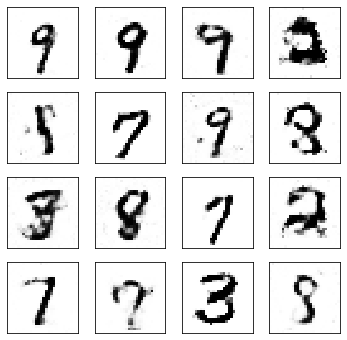

KeyboardInterrupt: 

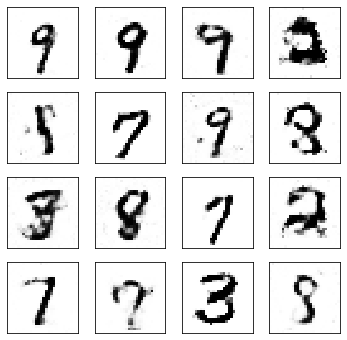

In [45]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torch.nn as nn
from torch.autograd import Variable
import itertools
import math
import time
import matplotlib.pyplot as plt
from IPython import display
import torchvision.datasets as dsets
import torch


transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,), std=(0.5,))
])
train_dataset = dsets.MNIST(root='~/tmp/mnis', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)


class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        out = self.model(x.view(x.size(0), 784))
        out = out.view(out.size(0), -1)
        return out


class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(100,200),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Dropout(0.3),
          nn.Linear(200, 400),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Dropout(0.3),
          nn.Linear(400, 784),
          nn.Tanh()
        )

    def forward(self, x):
        x = x.view(x.size(0), 100)
        out = self.model(x)
        return out
        
        
discriminator = Discriminator()
generator = Generator()
criterion = nn.BCELoss()
lr = 0.0002
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)


def train_discriminator(discriminator, images, real_labels, fake_images, fake_labels):
    discriminator.zero_grad()
    outputs = discriminator(images)
    real_loss = criterion(outputs, real_labels)
    real_score = outputs
    
    outputs = discriminator(fake_images) 
    fake_loss = criterion(outputs, fake_labels)
    fake_score = outputs

    d_loss = real_loss + fake_loss
    d_loss.backward()
    d_optimizer.step()
    return d_loss, real_score, fake_score


def train_generator(generator, outputs, real_labels):
    # 勾配を0に設定
    generator.zero_grad()
    # lossを設定
    g_loss = criterion(outputs, real_labels)
    # backwardを設定
    g_loss.backward()
    # オプティマイザーを設定
    g_optimizer.step()
    
    return g_loss


# draw samples from the input distribution to inspect the generation on training 
num_test_samples = 16
test_noise = Variable(torch.randn(num_test_samples, 100))

# create figure for plotting
size_figure_grid = int(math.sqrt(num_test_samples))
fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(6, 6))
for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
    ax[i,j].get_xaxis().set_visible(False)
    ax[i,j].get_yaxis().set_visible(False)

# set number of epochs and initialize figure counter
num_epochs = 200
num_batches = len(train_loader)
num_fig = 0


for epoch in range(num_epochs):
    for n, (images, _) in enumerate(train_loader):
        images = Variable(images)
        real_labels = Variable(torch.ones(images.size(0)))
        
        # Sample from generator
        noise = Variable(torch.randn(images.size(0), 100))
        fake_images = generator(noise)
        fake_labels = Variable(torch.zeros(images.size(0)))
        
        # Train the discriminator
        d_loss, real_score, fake_score = train_discriminator(discriminator, images, real_labels, fake_images, fake_labels)
        
        # Sample again from the generator and get output from discriminator
        noise = Variable(torch.randn(images.size(0), 100))
        fake_images = generator(noise)
        outputs = discriminator(fake_images)

        # Train the generator
        g_loss = train_generator(generator, outputs, real_labels)
        
        if (n+1) % 100 == 0:
            test_images = generator(test_noise)
            
            for k in range(num_test_samples):
                i = k//4
                j = k%4
                ax[i,j].cla()
                ax[i,j].imshow(test_images[k,:].data.cpu().numpy().reshape(28, 28), cmap='Greys')
            display.clear_output(wait=True)
            display.display(plt.gcf())
            
            plt.savefig('results/mnist-gan-%03d.png'%num_fig)
            num_fig += 1
            """
            print('Epoch [%d/%d], Step[%d/%d], d_loss: %.4f, g_loss: %.4f, D(x): %.2f, D(G(z)): %.2f', (epoch + 1, num_epochs, n+1, num_batches, d_loss.data[0], g_loss.data[0],
                    real_score.data.mean(), fake_score.data.mean()))
            """

fig.close()

学習が終わらないため、途中で強制終了した。
学習途中ではあるが、ノイズからMNISTの数字が生成されている。

###### 問題2 論文調査

GANは近年とても注目されている領域ということもあり、論文の数も多いです。今回はGANに関する以下の論文を読み、内容を2000字程度でまとめてください。その際、問題3を通じて得られた自分の経験を踏まえて述べるとなお良いです。
（2日目の終会で発表）

1.概要
これまでのGanは出力したいものを選んで出力させることができなかったが、Ganの学習の際にlableデータを付加し出力したいものを出力できるようにした。これをConditional Ganと呼ぶ

2.方法
Generatorへの入力データ(ノイズ)とDiscriminatorへの入力データ（本物データ）へ本物データ固有の情報（例：MNISTの場合0~9のラベル）を追加し、学習を進めることでこちらで指定した出力をGeneratorに出力させることができる。

＊考察
ノイズにデータ固有のデータを混ぜることでネットワークがその固有データに反応するように学習する。
したがって、入力ノイズに混ぜた固有データでGeneratorの出力を制御できる。

3.結果 (Unimodel)
Generator
入力ノイズZ(100cn)=> Relu (200ch) => out1
入力データラベルy(10ch)=>Relu(1000cn) => out2
out1+out2 => Relu(1200ch) => sigmoid()?

Discriminator

Batchサイズ:100
学習率:0.01 -> 0.000001 (減衰率1.00004でExpで減衰)
最適化：SGD
Dropout:0.5（Generator, Discriminatorへ適用）
データ:MNIST
結果：ラベル毎にGeneratorを出力させることができた

4.結果(Multimodal)
１枚の画像から複数の関連ワードを生成する。（Flickerの画像データを使う。ワードは画像にタグ付けられるキーワード。一枚の写真に対し複数のキーワードが付けられる）
ラベル情報はword embeddingによってベクトル化される。

Batchサイズ:100
学習率:0.01 -> 0.000001 (減衰率1.00004でExpで減衰)
最適化：SGD
Dropout:0.5（Generator, Discriminatorへ適用）
データ:MNIST
結果：１枚の画像に対して複数のキーワードを生成

5.今後
ここまでの結果はまだ初歩的な内容だが今後実用にあったて十分な可能性を示した。
複数のタグを組みわせて学習させ、より良い精度のタグ生成を行いたい。またより実用的な使用に向けて言語学習との組み合わせた学習を行いたい。

###### 問題3 論文実装

問題2で調査した、ConditionalGANを実装してください。実装には以下のGANの雛形に「Conditional」の部分を追加で実装するようにしてください。また通常のGANとConditionalGANの画像生成具合を比較してみましょう。

ローカル環境はリソース不足のため学習を進められなかった。Google colabで学習を行い付加したラベル情報通りの出力が得られることを確認した。

In [ ]:
[3, 7, 7, 4, 0, 8, 2, 1, 8, 7, 1, 4, 7, 2, 8, 5, 8, 2, 2, 4, 0, 3, 1, 1, 5]

<img src="Q3_result2.png">

In [ ]:
"""
Conditional  GAN
"""
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Embedding, concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import sys
import numpy as np

class CGAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100
        self.label_dim = 10

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim+self.label_dim,))
        y = Input(shape=(self.label_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator([img, y])

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model([z,y], validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()
        model.add(Dense(256, input_dim=self.latent_dim+self.label_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))
        model.summary()

        noise = Input(shape=(self.latent_dim+self.label_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):
        
        img = Input(shape=self.img_shape)
        label = Input(shape=(self.label_dim,))
        
        x = Flatten(input_shape=self.img_shape)(img)
        x = concatenate([x, label], axis=1)
        x = Dense(512)(x)
        x = LeakyReLU(alpha=0.2)(x)
        x = Dense(256)(x)
        x = LeakyReLU(alpha=0.2)(x)
        validity = Dense(1, activation='sigmoid')(x)
        model = Model([img, label], validity)
        model.summary()
        
        return model

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, y_train), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            image_y_int = y_train[idx]
            image_y = np.zeros((batch_size, self.label_dim))
            for i in range(batch_size):
                image_y[i, image_y_int[i]] = 1.0

            noise_x = np.random.normal(0, 1, (batch_size, self.latent_dim))
            noise_y_int = np.random.randint(0, 9, (batch_size, 1))
            noise_y = np.zeros((batch_size, self.label_dim))
            for i in range(batch_size):
                noise_y[i, noise_y_int[i]] = 1.0
            
            noise_xy = np.hstack((noise_x, noise_y))
            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise_xy)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, image_y] , valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, noise_y], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch([noise_xy, noise_y], valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise_x = np.random.normal(0, 1, (r * c, self.latent_dim))
        noise_y_int = np.random.randint(0, 9, (r * c, 1))
        noise_y = np.zeros((r * c, self.label_dim))
        for i in range(r * c):
            noise_y[i, noise_y_int[i]] = 1.0
        noise_xy = np.hstack((noise_x, noise_y))
        gen_imgs = self.generator.predict(noise_xy)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("cgan_images/%d.png" % epoch)
        print(noise_y_int)
        plt.close()
        

gan = CGAN()
gan.train(epochs=30000, batch_size=32,sample_interval=200)